In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
from sklearn.cluster import KMeans

dataset, classes = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=0.5, random_state=0)
# make as panda dataframe for easy understanding
df = pd.DataFrame(dataset, columns=['var1', 'var2'])
df.head(2)

,var1,var2
0,2.204387,1.560857
1,-1.133740,2.684673


In [ ]:
pip install yellowbrick

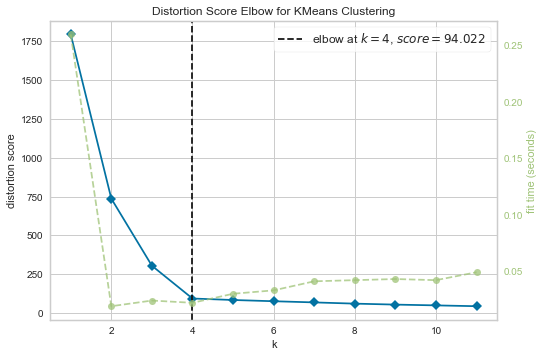

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [2]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df)
visualizer.show()

In [3]:

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df)

In [4]:
kmeans.labels_  # same as kmeans.predict(df)

array([1, 0, 3, 2, 1, 3, 0, 3, 3, 3, 3, 1, 0, 0, 1, 3, 2, 2, 2, 1, 2, 0,
       1, 0, 1, 1, 2, 1, 1, 3, 2, 3, 0, 1, 0, 3, 0, 3, 3, 2, 2, 2, 2, 3,
       1, 0, 3, 2, 2, 3, 2, 0, 0, 2, 3, 2, 0, 1, 3, 1, 2, 3, 1, 3, 2, 3,
       1, 2, 0, 0, 1, 1, 3, 3, 0, 2, 0, 0, 1, 1, 2, 3, 1, 0, 0, 3, 3, 1,
       0, 0, 2, 2, 2, 3, 3, 1, 0, 2, 3, 3, 2, 1, 1, 2, 2, 0, 3, 1, 1, 3,
       2, 0, 0, 1, 1, 3, 0, 0, 2, 3, 2, 0, 3, 1, 3, 0, 3, 0, 1, 3, 0, 1,
       0, 2, 2, 0, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1, 3, 1, 0, 2, 2, 2, 3, 0,
       1, 3, 2, 0, 2, 1, 2, 1, 1, 0, 0, 2, 3, 1, 1, 0, 1, 3, 0, 2, 2, 2,
       3, 3, 0, 3, 0, 1, 3, 1, 3, 0, 0, 2, 3, 2, 1, 1, 3, 2, 0, 0, 0, 3,
       2, 1])

In [5]:
kmeans.inertia_

94.02242630751752

In [6]:
from collections import Counter
Counter(kmeans.labels_)

Counter({1: 50, 0: 50, 3: 50, 2: 50})

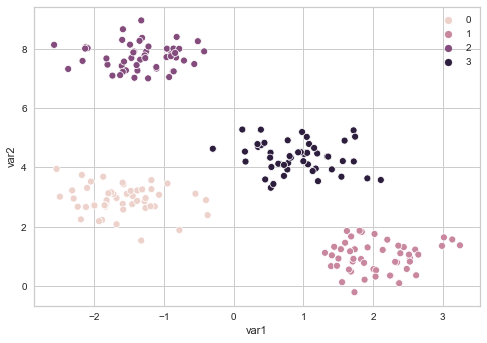

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x="var1", y="var2", hue=kmeans.labels_)
plt.show()

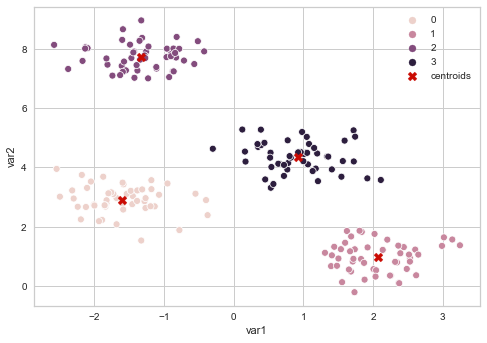

In [8]:
sns.scatterplot(data=df, x="var1", y="var2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()